<img src="./images/eu_banner.png" alt="EU Banner" width="100%"/>

# **LISFLOOD Use Case - 2) Model Initialization Run**
---

This use case intends to introduce the basic mechanics of the hydrological model [LISFLOOD](https://github.com/ec-jrc/lisflood-code/).
<br>
In this exercise, the objective is to conduct a model initialization run read and visualize the two created outputs that are important for the actual model run of LISFLOOD. <br>
In detail, the initialization run aims to produce the required files of two rate variables:

* **`avgdis.nc`**: a map of the average discharge in the river network.
* **`lzavin.nc`**: a map of the average inflow into the lower groundwater zone.

As this is a very crucial step, we strongly recommend the users to have a further read [here](https://ec-jrc.github.io/lisflood-code/3_step5_model-initialisation/).


<img src="./images/image_init.png" alt="EU Banner" width="50%"/>


## **2) Initialization Settings**

First we will have a brief look at the settings file that is needed for the initialization and the corresponding setup we can find inside.<br>
LISFLOOD usually works with 2 standalone settings.xml files, one for the actual run & one for the initialization run.
In our example we find the files in **`/settings`**, in which we have:
* **`Settings_PreRun.xml`**: the settings file prepared and used for the initialization run (this exercise)  
* **`Settings_Run.xml`**: the settings file prepared and used for the actual model or calibration run

---

Let us check the most important settings for the initialization run:

<small>

```xml
<lfoptions>
    # [...]
    
    # INITIALIZATION RUN
    <setoption choice="1" name="InitLisflood"/>

    # [...]
</lfoptions>

<lfuser>
    # [...]

    # GENERAL MODEL SETUP RUN
    <textvar name="PathRoot" value= "./../7859_testing">
    <textvar name="PathInit" value="$(PathRoot)/initial">
    <textvar name="AvgDis" value="$(PathInit)/avgdis">
    <textvar name="LZAvInflowMap" value="$(PathInit)/lzavin">
    <textvar name="CalendarDayStart" value="02/01/1975 00:00">
    <textvar name="StepStart" value="02/01/1975 00:00">
    <textvar name="StepEnd" value="01/01/2024 00:00">
    <textvar name="timestepInit" value="1"/>
    <textvar name="DtSec" value="86400"/>
    <textvar name="DtSecChannel" value="14400"/>

    # [...]

    # INITIAL CONDITIONS
    # water balance
    <textvar name="OFDirectInitValue" value="0">
    <textvar name="OFOtherInitValue" value="0">
    <textvar name="OFForestInitValue" value="0">
    <textvar name="SnowCoverAInitValue" value="0">
    <textvar name="SnowCoverBInitValue" value="0">
    <textvar name="SnowCoverCInitValue" value="0">
    <textvar name="FrostIndexInitValue" value="0">
    <textvar name="CumIntInitValue" value="0">
    <textvar name="UZInitValue" value="0">
    <textvar name="DSLRInitValue" value="1">

    # soil
    <textvar name="LZInitValue" value="-9999">
    <textvar name="ThetaInit1Value" value="-9999">
    <textvar name="ThetaInit2Value" value="-9999">
    <textvar name="ThetaInit3Value" value="-9999">

    # channel
    <textvar name="TotalCrossSectionAreaInitValue" value="-9999">
    <textvar name="CrossSection2AreaInitValue" value="-9999">
    <textvar name="PrevSideflowInitValue" value="-9999">
    <textvar name="PrevDischarge" value="-9999">
    <textvar name="PrevDischargeAvg" value="-9999">
    <textvar name="PrevCmMCTInitValue" value="-9999">
    <textvar name="PrevDmMCTInitValue" value="-9999">

    # lake (if simulateLakes = 1)
    <textvar name="LakeInitialLevelValue" value="-9999">
    <textvar name="LakePrevInflowValue" value="-9999">
    <textvar name="LakePrevOutflowValue" value="-9999">

    # forest
    <textvar name="CumIntForestInitValue" value="0">
    <textvar name="UZForestInitValue" value="0">
    <textvar name="DSLRForestInitValue" value="1">
    <textvar name="ThetaForestInit1Value" value="-9999">
    <textvar name="ThetaForestInit2Value" value="-9999">
    <textvar name="ThetaForestInit3Value" value="-9999">

    # irrigation
    <textvar name="CumIntIrrigationInitValue" value="0">
    <textvar name="UZIrrigationInitValue" value="0">
    <textvar name="DSLRIrrigationInitValue" value="1">
    <textvar name="ThetaIrrigationInit1Value" value="-9999">
    <textvar name="ThetaIrrigationInit2Value" value="-9999">
    <textvar name="ThetaIrrigationInit3Value" value="-9999">

    # impervious (sealed) areas
    
    <textvar name="CumIntSealedInitValue" value="0">
    # [...]
</lfuser>
```


Let us quickly go through the setting:
* It is important that you set the **`InitLisflood`** setting to 1 so that LISFLOOD detects the run as initialization run.
* The general settings block is likely straightforward as it allows you to set the simulation period, time steps, output and input paths.
    * Note for example that LISFLOOD uses an "End of Timestep" convention which is why you might notice that the the run is set from **`02/01/1975`** to **`01/01/2024`** which represents the start at 1st of January 1975 and the end of the simulation at the 31st of December 2024.
* In addition, there is a dedicated block that is used to define and determine the initial conditions of LISFLOOD.
    * You might notice different values there: **`0, 1 and -9999`** 
    * 0 just indicates that the indicated storage (state variable) will start empty, while a value of 1 bsaically is used for **`DSLR`** only, which refers to "days since last rainfall". 
    * However, most of the initialization values are -9999 that can be seen as a "bogus" value or flag that LISFLOOD internally initializes the corresponding variable. <br>
    To provide an example: For **`ThetaXX`** variables, the initial soil moisture is set to field capacity.<br> 
    Other examples are **`PrevDischarge`** and **`TotalCrossSectionAreaInitValue`**, where a value of -9999 indicates: initial discharge and water level in the channels at half of bankfull depth.<br>
    More details can be found [here](https://ec-jrc.github.io/lisflood-code/3_step5_model-initialisation/).
    * Note that the initialization section of course looks different for the pre-run compared to the normal run. 

If everything is set properly in your **`Settings_PreRun.xml`** file then we can start running the initialization run.
For that, open the terminal, navigate to your settings folder, activate your conda environment where you installed LISFLOOD and run the model.
This should look as follows:

```bash
conda activate <your_lisflood_environment>
cd <path_where_you_saved_the_repository>/settings/
lisflood Settings_PreRun.xml

When the run was successfull, you should have a **`lzavin.nc`** files in your **`Initial`** folder as described before.<br>
We will now check how the steady-state percolation values in this file look!

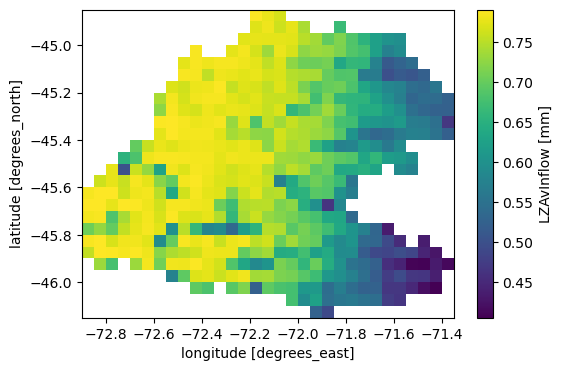

In [11]:
from pathlib import Path
from datetime import datetime

import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

# read and plot the maps
outfold = Path("/home/schafti/Documents/01_Hydrology/01_Lisflood/00_SourceCode/01_Playground/01_Test_Usecase/create_submodel_7859/7859_testing/initial/")
lzavin_file = "lzavin.nc"
avgdis_file = "avgdi.nc"

lzavin = xr.open_dataset(outfold / lzavin_file)
# avgdis = xr.open_dataset(outfold / avgdis_file)

# plotting
fig, ax = plt.subplots(figsize=(6,4))
lzavin.lzavin.plot(ax=ax);

We can nicely see how the lower, flat, areas of the Aisén have higher percolation to the lower groundwater layer compared to the higher terrain in the upstream part. <br>
As the maps represent averages of the specified simulation period, of course we only have one value per pixel. 
